# SeaIce-Prediction

### how does the extantion of seaice influence the climate?  
- discription of topic and goal of the project  
- for what/whom is it important to know?

In [131]:
#import of the neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ftplib import FTP
import os
import warnings

warnings.filterwarnings('ignore')

## Data on daily basis

#### Loading the daily data for seaice extent

In [2]:
#code from https://nsidc.org/support/64231694-FTP-Client-Data-Access
#!/usr/bin/env python
# NSIDC
# Sample script to download all the files within one directory on the FTP server
#
# Requires Python3 and the ftplib and os libraries

### The following 3 variables can be changed ###
# 1. Set the directory you would like to download the files to
destdir='../data'

# 2. Set the path to the FTP directory that contains the data you wish to download.
# This example is for the daily northern hemisphere data from the Sea Ice Index
# https://nsidc.org/data/g02135
directory = '/DATASETS/NOAA/G02135/north/daily/data'

# 3. Set the password which will be your email address
password = 'kaddygorrissen@gmail.com'

############################################
### Don't need to change this code below ###
############################################
# FTP server
ftpdir = 'sidads.colorado.edu'

#Connect and log in to the FTP
print('Logging in')
ftp = FTP(ftpdir)
ftp.login('anonymous',password)

# Change to the directory where the files are on the FTP
print('Changing to '+ directory)
ftp.cwd(directory)

# Get a list of the files in the FTP directory
files = ftp.nlst()
files = files[2:]
print(files)

#Change to the destination directory on own computer where you want to save the files
os.chdir(destdir)

#Download all the files within the FTP directory
for file in files:
    print('Downloading...' + file)
    ftp.retrbinary('RETR ' + file, open(file, 'wb').write)

#Close the FTP connection
ftp.quit()

Logging in
Changing to /DATASETS/NOAA/G02135/north/daily/data
['N_seaice_extent_climatology_1981-2010_v3.0.csv', 'N_seaice_extent_daily_v3.0.csv', 'N_seaice_extent_daily_v3.0.csv.bak']
Downloading...N_seaice_extent_climatology_1981-2010_v3.0.csv
Downloading...N_seaice_extent_daily_v3.0.csv
Downloading...N_seaice_extent_daily_v3.0.csv.bak


'221-Goodbye. You uploaded 0 and downloaded 3844 kbytes.\n221 Logout.'

In [ ]:
#the same for the southern hemisphere
# 1. Set the directory you would like to download the files to
destdir='../data'

# 2. Set the path to the FTP directory that contains the data you wish to download.
# This example is for the daily southern hemisphere data from the Sea Ice Index
# https://nsidc.org/data/g02135
directory = '/DATASETS/NOAA/G02135/south/daily/data'

# 3. Set the password which will be your email address
password = 'kaddygorrissen@gmail.com'

############################################
### Don't need to change this code below ###
############################################
# FTP server
ftpdir = 'sidads.colorado.edu'

#Connect and log in to the FTP
print('Logging in')
ftp = FTP(ftpdir)
ftp.login('anonymous',password)

# Change to the directory where the files are on the FTP
print('Changing to '+ directory)
ftp.cwd(directory)

# Get a list of the files in the FTP directory
files = ftp.nlst()
files = files[2:]
print(files)

#Change to the destination directory on own computer where you want to save the files
os.chdir(destdir)

#Download all the files within the FTP directory
for file in files:
    print('Downloading...' + file)
    ftp.retrbinary('RETR ' + file, open(file, 'wb').write)

#Close the FTP connection
ftp.quit()

Logging in
Changing to /DATASETS/NOAA/G02135/south/daily/data
['S_seaice_extent_climatology_1981-2010_v3.0.csv', 'S_seaice_extent_daily_v3.0.csv', 'S_seaice_extent_daily_v3.0.csv.bak']
Downloading...S_seaice_extent_climatology_1981-2010_v3.0.csv
Downloading...S_seaice_extent_daily_v3.0.csv
Downloading...S_seaice_extent_daily_v3.0.csv.bak


'221-Goodbye. You uploaded 0 and downloaded 3848 kbytes.\n221 Logout.'

In [ ]:
df_s = pd.read_csv('../data/S_seaice_extent_daily_v3.0.csv')
df_s.head()

,Year,Month,Day,Extent,Missing,Source Data
0,YYYY,MM,DD,10^6 sq km,10^6 sq km,Source data product web sites: http://nsidc.o...
1,1978,10,26,17.624,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
2,1978,10,28,17.803,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
3,1978,10,30,17.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
4,1978,11,01,17.527,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...


##### Exploring the data

In [27]:
df_n = pd.read_csv('../data/N_seaice_extent_daily_v3.0.csv')
df_n.head()

,Year,Month,Day,Extent,Missing,Source Data
0,YYYY,MM,DD,10^6 sq km,10^6 sq km,Source data product web sites: http://nsidc.o...
1,1978,10,26,10.231,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
2,1978,10,28,10.420,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
3,1978,10,30,10.557,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
4,1978,11,01,10.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...


In [28]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14184 entries, 0 to 14183
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          14184 non-null  object
 1    Month        14184 non-null  object
 2    Day          14184 non-null  object
 3        Extent   14184 non-null  object
 4       Missing   14184 non-null  object
 5    Source Data  14184 non-null  object
dtypes: object(6)
memory usage: 665.0+ KB


In [29]:
#drop first row because it's the description
df_n1 = df_n.iloc[1:,:]
df_n1.head()

,Year,Month,Day,Extent,Missing,Source Data
1,1978,10,26,10.231,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
2,1978,10,28,10.420,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
3,1978,10,30,10.557,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
4,1978,11,01,10.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...
5,1978,11,03,10.777,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_19...


In [34]:
df_n1.columns[1]

' Month'

In [38]:
#changing the column-names because there is a space in front of Month and Day
df_n1.rename(columns={ df_n1.columns[1]: "month"}, inplace=True)
df_n1.rename(columns={ df_n1.columns[2]: "day"}, inplace=True)
df_n1.head()

/var/folders/n6/pxw1kryn6t59z840_pp_b7c40000gn/T/ipykernel_47923/1519375825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n1.rename(columns={ df_n1.columns[1]: "month"}, inplace=True)
/var/folders/n6/pxw1kryn6t59z840_pp_b7c40000gn/T/ipykernel_47923/1519375825.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n1.rename(columns={ df_n1.columns[2]: "day"}, inplace=True)


,Year,month,day,Extent,Missing,Source Data,date
1,1978,10,26,10.231,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...,1978-10-26
2,1978,10,28,10.420,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...,1978-10-28
3,1978,10,30,10.557,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...,1978-10-30
4,1978,11,01,10.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...,1978-11-01
5,1978,11,03,10.777,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_19...,1978-11-03


In [39]:
#change the date columns to pd.to_datetime
df_n1['date'] = pd.to_datetime(df_n1[['Year', 'month', 'day']])
df_n1.head()

/var/folders/n6/pxw1kryn6t59z840_pp_b7c40000gn/T/ipykernel_47923/2454795206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n1['date'] = pd.to_datetime(df_n1[['Year', 'month', 'day']])


,Year,month,day,Extent,Missing,Source Data,date
1,1978,10,26,10.231,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...,1978-10-26
2,1978,10,28,10.420,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...,1978-10-28
3,1978,10,30,10.557,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...,1978-10-30
4,1978,11,01,10.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...,1978-11-01
5,1978,11,03,10.777,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_19...,1978-11-03


In [43]:
df_n1.rename(columns={ df_n1.columns[3]: "extent"}, inplace=True)
df_n1.head()

/var/folders/n6/pxw1kryn6t59z840_pp_b7c40000gn/T/ipykernel_47923/1375139573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n1.rename(columns={ df_n1.columns[3]: "extent"}, inplace=True)


,Year,month,day,extent,Missing,Source Data,date
1,1978,10,26,10.231,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...,1978-10-26
2,1978,10,28,10.420,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...,1978-10-28
3,1978,10,30,10.557,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...,1978-10-30
4,1978,11,01,10.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...,1978-11-01
5,1978,11,03,10.777,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_19...,1978-11-03


In [47]:
#general plot settings
font = {'weight' : 'bold',
        'size'   : 14}
plt.rc('font', **font)
plt.rc('figure',figsize=(16, 9)) 
plt.rcParams['axes.labelweight'] = 'bold'


<AxesSubplot:xlabel='date'>

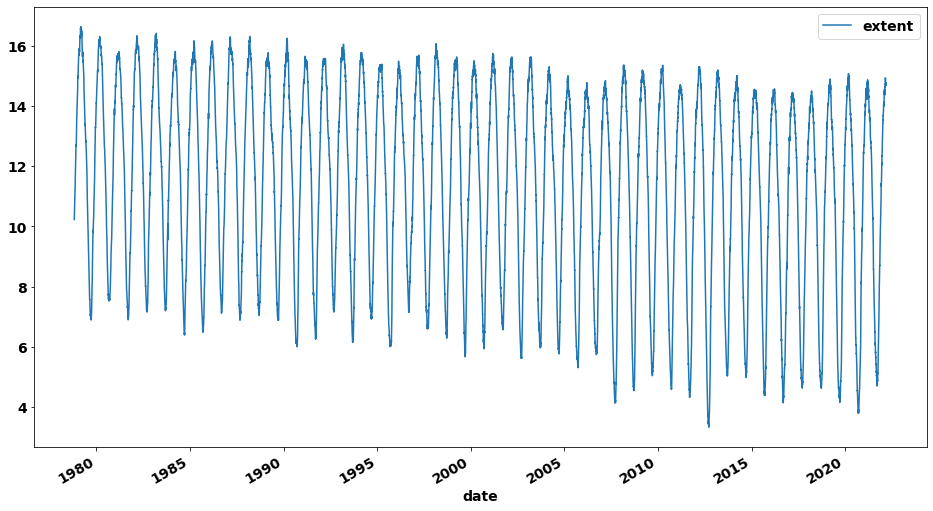

In [132]:
df_n1['extent'] = df_n1['extent'].astype(float)
df_n1.plot(x='date', y='extent')

### Monthly Data

In [61]:
# NSIDC monthly Sea ice extent, 25 km resolution, Northern hemisphere
# the data is in separate csv.-file for each month
# creating a complete unsorted csv.-file

import glob

path = r'../data/n_monthly' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

frame.tail()

,year,mo,data-type,region,extent,area
515,2017,6,Goddard,N,10.76,8.63
516,2018,6,Goddard,N,10.78,8.79
517,2019,6,Goddard,N,10.59,8.32
518,2020,6,Goddard,N,10.59,8.41
519,2021,6,NRTSI-G,N,10.71,8.38


In [133]:
# add a column for the day
frame['day'] = 1
frame.head()

,year,month,data_type,region,extent,area,day,date
0,1978,11,Goddard,N,11.65,9.04,1,1978-11-01
1,1978,12,Goddard,N,13.67,10.90,1,1978-12-01
2,1979,1,Goddard,N,15.41,12.41,1,1979-01-01
3,1979,2,Goddard,N,16.18,13.18,1,1979-02-01
4,1979,3,Goddard,N,16.34,13.21,1,1979-03-01


In [135]:
#rename the columns because of spaces in front of the name and create a datetime
frame.rename(columns={ frame.columns[1]: "month"}, inplace=True)
frame['date'] = pd.to_datetime(frame[['year', 'month', 'day']])
frame.head()

,year,month,data_type,region,extent,area,day,date
0,1978,11,Goddard,N,11.65,9.04,1,1978-11-01
1,1978,12,Goddard,N,13.67,10.90,1,1978-12-01
2,1979,1,Goddard,N,15.41,12.41,1,1979-01-01
3,1979,2,Goddard,N,16.18,13.18,1,1979-02-01
4,1979,3,Goddard,N,16.34,13.21,1,1979-03-01


In [136]:
#sorting by date and reset the index
frame.sort_values(by='date', inplace=True)
frame = frame.reset_index(drop=True)
frame.head()

,year,month,data_type,region,extent,area,day,date
0,1978,11,Goddard,N,11.65,9.04,1,1978-11-01
1,1978,12,Goddard,N,13.67,10.90,1,1978-12-01
2,1979,1,Goddard,N,15.41,12.41,1,1979-01-01
3,1979,2,Goddard,N,16.18,13.18,1,1979-02-01
4,1979,3,Goddard,N,16.34,13.21,1,1979-03-01


In [138]:
#rename the columns because of spaces in front of the name
frame.rename(columns={ frame.columns[2]: "data_type"}, inplace=True)
frame.rename(columns={ frame.columns[3]: "region"}, inplace=True)
frame.rename(columns={ frame.columns[4]: "extent"}, inplace=True)
frame.rename(columns={ frame.columns[5]: "area"}, inplace=True)

df_month = frame[['date','data_type','region','extent','area','year','month']]
df_month.head()

,date,data_type,region,extent,area,year,month
0,1978-11-01,Goddard,N,11.65,9.04,1978,11
1,1978-12-01,Goddard,N,13.67,10.90,1978,12
2,1979-01-01,Goddard,N,15.41,12.41,1979,1
3,1979-02-01,Goddard,N,16.18,13.18,1979,2
4,1979-03-01,Goddard,N,16.34,13.21,1979,3


In [128]:
df_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       520 non-null    datetime64[ns]
 1   data_type  520 non-null    object        
 2   region     520 non-null    object        
 3   extent     520 non-null    float64       
 4   area       520 non-null    float64       
 5   year       520 non-null    int64         
 6   month      520 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 28.6+ KB


In [139]:
df_month.describe()

,extent,area,year,month
count,520.000000,520.000000,520.000000,520.000000
mean,-27.110231,-48.453846,2000.000000,6.500000
std,620.228247,758.724674,12.523581,3.470215
min,-9999.000000,-9999.000000,1978.000000,1.000000
25%,8.547500,6.227500,1989.000000,3.000000
50%,12.060000,9.930000,2000.000000,6.500000
75%,14.300000,12.282500,2011.000000,10.000000
max,16.340000,13.900000,2022.000000,12.000000


In [140]:
#although there are no missing values there are min values of -9999 in the extent and area column
#replacing the -9999 values in extent and area

for index, val in enumerate(df_month['extent']):
    if val == -9999:
        df_month['extent'].loc[index] = df_month['extent'].loc[index - 12]

for index, val in enumerate(df_month['area']):
    if val == -9999:
        df_month['area'].loc[index] = df_month['area'].loc[index - 12]  

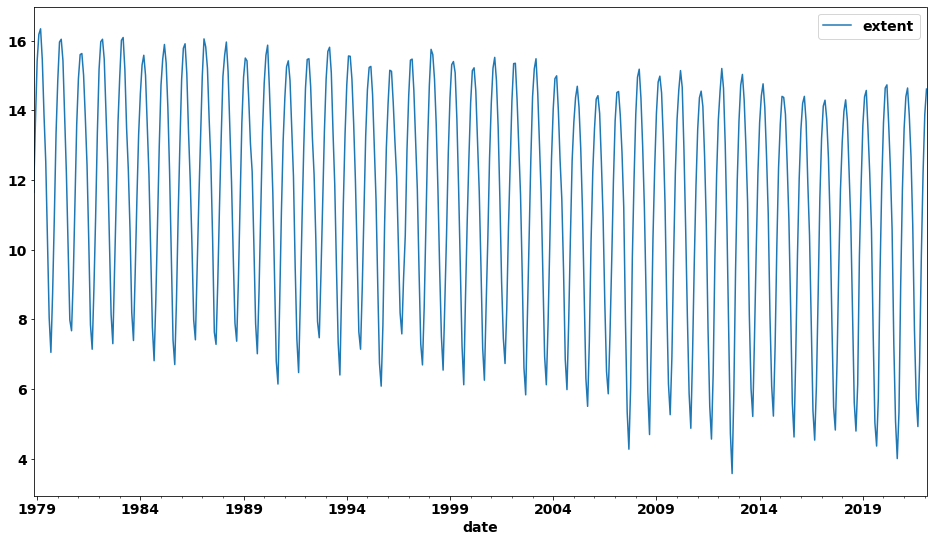

In [126]:
df_month.plot(x='date', y='extent');